# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="p1_navigation/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

When finished, you can close the environment.

### 4. Lets traing our Agent

Now were are going to train our Agent...

```python
python code
```

In [3]:
import torch 
from collections import deque

def train(agent, n_episodes, max_steps, eps_start, eps_end, eps_decay, success_reward):
    
    # Reset scores
    scores = []                       
    scores_window = deque(maxlen=100) 

    # Initialize epsilon
    eps = eps_start

    # Training loop                
    for i_episode in range(1, n_episodes+1):
        
        # Reset environment and get first   
        env_info = env.reset(train_mode=True)[brain_name]
        
        # Get initial state
        state = env_info.vector_observations[0]
    
        # Loop over step by step 
        score = 0
        for t in range(max_steps):

            # Epsilon-greedy action selection
            action = int(agent.act(state, eps))

            # Take action
            env_info = env.step(action)[brain_name]

            # Get next state
            next_state = env_info.vector_observations[0]   

            # Get reward
            reward = env_info.rewards[0]

            # Get done              
            done = env_info.local_done[0]  

            # Take one step (add experience & learn)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
            
        scores_window.append(score)       
        scores.append(score)              
        eps = max(eps_end, eps_decay*eps)

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
        # If the we reached the minimum success reward -> Environment solved, save model
        if np.mean(scores_window)>= success_reward:
            print('\nEnvironment solved in {:d} episodes!')
            print('Average Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break

    return scores

In [4]:
# Get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# Reset environment
env_info = env.reset(train_mode=True)[brain_name] # reset the environment

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [5]:
# Agent 
GAMMA = 0.99            # Discount factor
TAU = 1e-3              # For soft update of target parameters
LR = 5e-4               # Learning rate
UPDATE_EVERY = 8        # How often to update the network

BUFFER_SIZE = int(1e5)  # Replay buffer size
BATCH_SIZE = 128         # Minibatch size

from dqn_agent import Agent
agent = Agent(state_size, action_size, GAMMA, TAU, LR, UPDATE_EVERY, BUFFER_SIZE, BATCH_SIZE)

Agent created!


/home/javier/anaconda3/envs/drldn/lib/python3.6/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


Episode 100	Average Score: -0.13
Episode 200	Average Score: 0.543
Episode 300	Average Score: -0.04
Episode 400	Average Score: -0.02
Episode 500	Average Score: 0.111
Episode 600	Average Score: -0.05
Episode 700	Average Score: 0.101
Episode 800	Average Score: 0.03
Episode 900	Average Score: -0.07
Episode 1000	Average Score: 0.09
Episode 1100	Average Score: 0.09
Episode 1200	Average Score: 0.11
Episode 1300	Average Score: 0.13
Episode 1400	Average Score: -0.05
Episode 1500	Average Score: -0.03
Episode 1600	Average Score: -0.02
Episode 1700	Average Score: 0.121
Episode 1800	Average Score: 0.051
Episode 1900	Average Score: -0.01
Episode 2000	Average Score: -0.10


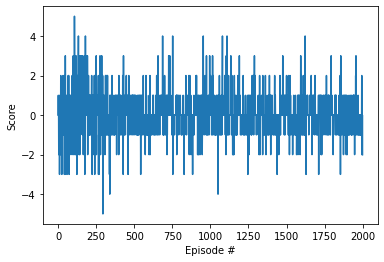

In [6]:
# Training 
N_EPISODES = 2000
MAX_STEPS = 2000
EPSILON_START = 1.0
EPSILON_END = 0.01
EPSILON_DECAY = 0.99

SUCCESS_REWARD = 14

scores = train(agent, N_EPISODES, MAX_STEPS, EPSILON_START, EPSILON_END, EPSILON_DECAY, SUCCESS_REWARD)

# Plot the scores
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
# plt.savefig('training_best.png')
plt.show()

In [ ]:

# Reset the environment for training
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# Number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# Examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

# Create the agent
agente_bananero = Agent(state_size, action_size)

# Train the agent